In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [88]:
df = pd.read_csv("crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [89]:
label = df.groupby("label")
label

In [90]:
label.get_group("rice")

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [91]:
label[["humidity"]].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [92]:
labels = list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [93]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

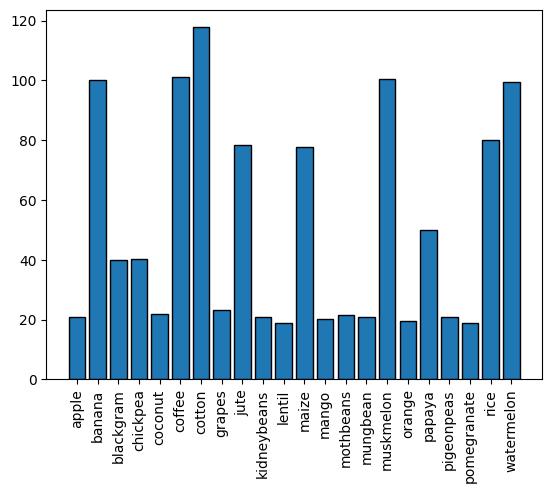

In [94]:
plt.bar(x = labels , height =nitrogen,ec ="k")
plt.xticks(rotation = 90)
plt.show()

In [95]:
x = df.drop("label",axis=1)

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transformed = sc.fit_transform(x)
x_transformed.shape

(2200, 7)

In [97]:
desc = pd.DataFrame(x_transformed).describe()
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [98]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [99]:
desc_formatted = desc.applymap(lambda x : f"{int(x):d}")
desc_formatted.head()

C:\Users\MY\AppData\Local\Temp\ipykernel_2300\3052499131.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x : f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0


In [100]:
from sklearn.cluster import KMeans
KMeans = KMeans()
KMeans.fit(x_transformed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [101]:
label = KMeans.labels_

In [102]:
df["cluster_8"] = label

In [103]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_8
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,6
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,6
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,6
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,6
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,6
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,6
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,6
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [104]:
df["cluster_8"].value_counts()

cluster_8
2    465
5    384
1    355
6    311
4    285
0    200
7    164
3     36
Name: count, dtype: int64

In [105]:
df[df["label"]=="rice"]["cluster_8"].value_counts()

cluster_8
6    100
Name: count, dtype: int64

In [106]:
df[df["cluster_8"]== 5]["label"].value_counts()

label
kidneybeans    100
chickpea        94
pigeonpeas      78
mango           59
mothbeans       37
lentil          15
maize            1
Name: count, dtype: int64

In [107]:
from sklearn.metrics import silhouette_score
silhouette_score(x_transformed,label)

0.29055533766018027

In [108]:
KMeans.inertia_

5436.121771717214

In [109]:
WCSS = {}
from sklearn.cluster import KMeans as SKKMeans
for i in range(5, 51):
    kmeans = SKKMeans(n_clusters=i)
    kmeans.fit(x_transformed)
    WCSS[i] = kmeans.inertia_

In [110]:
WCSS

{5: 6868.015073390174,
 6: 6060.974638513835,
 7: 5637.812966847223,
 8: 4907.925352937291,
 9: 4479.171539483068,
 10: 4257.243009714388,
 11: 4088.3691668270867,
 12: 3681.836625393218,
 13: 3387.484247251874,
 14: 3327.382508848361,
 15: 3065.395376340406,
 16: 2920.499472206317,
 17: 2838.1868612201392,
 18: 2680.394612583953,
 19: 2665.780352043172,
 20: 2477.9350179290195,
 21: 2430.1791639319244,
 22: 2378.8154384097943,
 23: 2203.7760914191995,
 24: 2220.245676326831,
 25: 2121.920189285755,
 26: 1997.5986447084517,
 27: 1970.3091866612922,
 28: 1856.892449834278,
 29: 1822.1676463449105,
 30: 1754.997891161285,
 31: 1702.8859397436302,
 32: 1675.111412951615,
 33: 1628.8989817594115,
 34: 1625.007916377474,
 35: 1628.1152402127855,
 36: 1572.8847726912502,
 37: 1520.0802540610582,
 38: 1485.3020567033639,
 39: 1469.868416344406,
 40: 1415.114583505872,
 41: 1379.4156572809145,
 42: 1365.4322048299423,
 43: 1375.1784539782896,
 44: 1342.6100095534177,
 45: 1351.8695435441455,
 

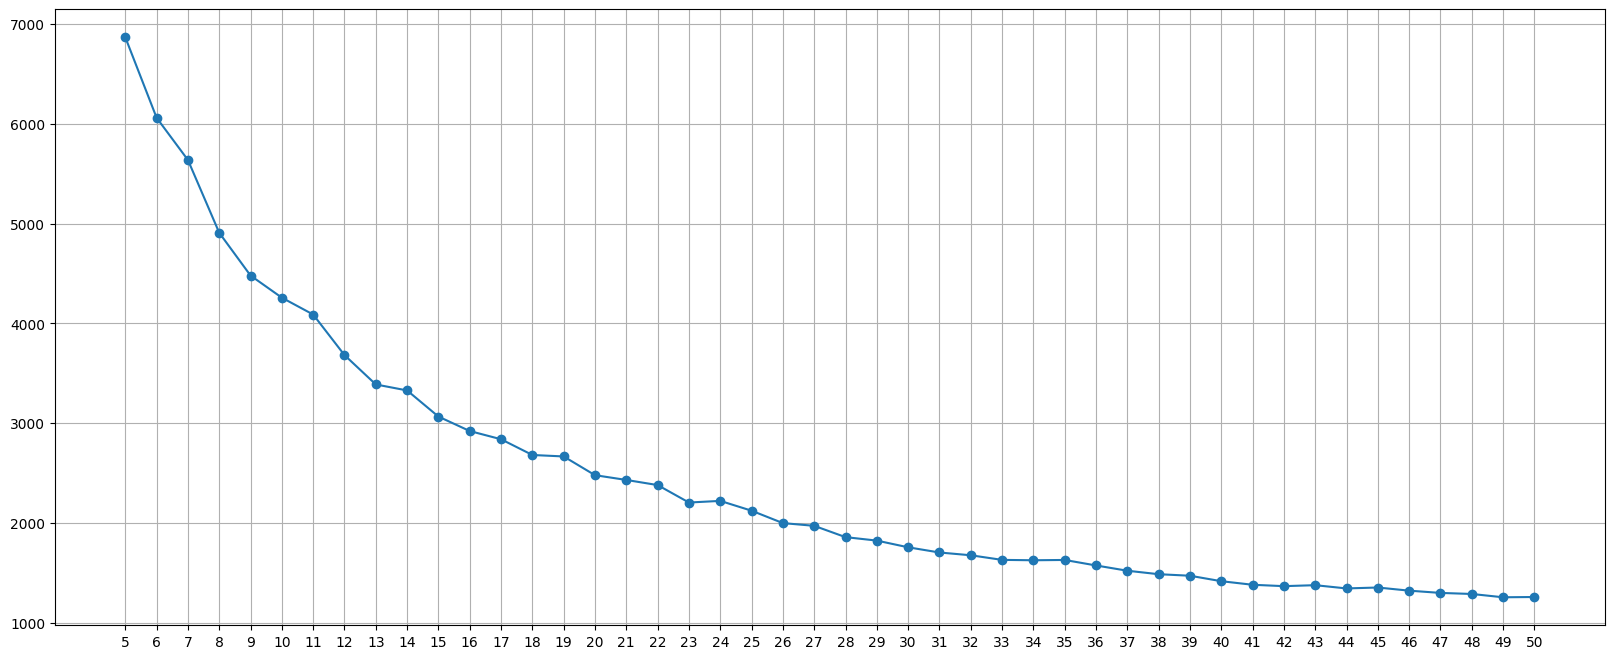

In [111]:
plt.figure(figsize=(20,8))
plt.plot(WCSS.keys(),WCSS.values(),marker = "o")

plt.xticks(list(WCSS.keys()))
plt.grid(True)
plt.show()

In [112]:
import joblib

joblib.dump(KMeans,"crop_reco_kmeans.lb")

['crop_reco_kmeans.lb']

In [113]:
joblib.dump(sc,"scaler.lb")

['scaler.lb']

In [114]:
joblib.dump(df,"crop_reco_df.lb")

['crop_reco_df.lb']